# Philanthropy Data Analysis

•	What is the correlation between donor source of wealth and amount of money given over the course of recent years? 

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns
from textwrap import wrap
import random
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Read in the donation data
data_2015 = pd.read_csv("chronicle_data2015.csv", encoding = "ISO-8859-1")
data_2016 = pd.read_csv("chronicle_data2016.csv", encoding = "ISO-8859-1")
data_2017 = pd.read_csv("chronicle_data2017.csv", encoding = "ISO-8859-1")
data_2018 = pd.read_csv("chronicle_data2018.csv", encoding = "ISO-8859-1")
wealth_cat = pd.read_csv("All_wealth_subcategory.csv", encoding = "utf-8")
data_2016.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2016,Philip H. and Penelope Knight,Oregon,Manufacturing,U. of Oregon (Eugene),Oregon,Colleges and universities,Pledge,"$500,000,000"
1,2016,Nicolas Berggruen Charitable Trust (Nicolas Be...,California,Investments,Berggruen Institute (Los Angeles),California,Public affairs,NaN,"$500,000,000"


In [3]:
# Combine the data into a single dataset 
combo = [data_2015, data_2016, data_2017, data_2018]
all_df = pd.concat(combo)
all_df.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,"$605,000,000"
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,"$400,000,000"


In [4]:
# Finding the unique names for the donors source of wealth
#all_df["Donor's Source of Wealth"].unique()

In [5]:
# Review field formats in the combined table prior to any calculations
describe = all_df.describe()
describe
datatype = all_df.dtypes
print(datatype)

Year                         int64
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                  object
dtype: object


In [6]:
# Convert column values
all_df["Gift Value"] = all_df["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].astype(str)
all_df["Year"] = all_df["Year"].astype(str)
all_df.dtypes

Year                        object
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
dtype: object

In [7]:
dfinal = all_df.merge(wealth_cat, on=("Donor's Source of Wealth", "Donor's Source of Wealth"), how = 'left')
dfinal.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value,Wealth Category
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,605000000,Real Estate
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,400000000,Finance


In [8]:
#Find the name of all columns in the new dataframe
dfinal.columns

Index(['Year', 'Donor', 'Where Donor Lives', 'Donor's Source of Wealth',
       'Recipient', 'Recipient Location', 'Cause', 'Gift type', 'Gift Value',
       'Wealth Category'],
      dtype='object')

In [88]:
# Convert column values
dfinal["Gift Value"] = dfinal["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
dfinal["Donor's Source of Wealth"] = dfinal["Donor's Source of Wealth"].astype(str)
dfinal["Year"] = dfinal["Year"].astype(int)
dfinal.dtypes

Year                         int32
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
Wealth Category             object
dtype: object

In [10]:
#look at all values for Donor's Source of Wealthr donor wealth
Total = dfinal["Gift Value"].sum()
donors = dfinal["Donor"].count()
print(Total,":", donors)

40928320354 : 3234


In [11]:
# Split categorical string for Donor Wealth
# all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].str.split(pat=", ", expand=True)
# all_df.head()

In [94]:
#Top 5 by Donation Amount
result = dfinal.nlargest(5, columns="Gift Value")
result

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value,Wealth Category
1820,2017,Mark Zuckerberg and Priscilla Chan,California,Technology,"Chan Zuckerberg Foundation (Palo Alto, Calif.)",California,Foundations,Gift,1856575000,Technology
1821,2017,Michael S. and Susan Dell,Texas,Technology,"Michael & Susan Dell Foundation (Austin, Tex.)",Texas,Foundations,Gift,1000000000,Technology
1822,2017,Henry L. Hillman,Pennsylvania,"Family wealth, Investments",Hillman Family Foundation (Pittsburgh),Pennsylvania,Foundations,Bequest,800000000,Family wealth
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,605000000,Real Estate
1823,2017,Herbert and Florence Irving,New York,Food and beverage,"Columbia U., Herbert and Florence Irving Medic...",New York,Health,Gift,600000000,Entertainment


In [14]:
#Bottom 5 by Donation Amount
result = dfinal.nsmallest(5, columns="Gift Value")
result

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value,Wealth Category
1757,2016,Anonymous,NaN,nan,Cheyenne Mountain Zoo (Colorado Springs),Colorado,Zoos and aquariums,NaN,100000,NaN
622,2015,Bill and Ruth Scott,Nebraska,Investments,U. of Nebraska Medical Center (Omaha),Nebraska,Health,Gift,1000000,Finance
623,2015,Lefkofsky Family Foundation (Eric and Elizabet...,Illinois,Technology,Rehabilitation Institution of Chicago,Illinois,Health,NaN,1000000,Technology
624,2015,Edsel B. Ford II and Cynthia Ford,Michigan,"Family wealth, Transportation",Juvenile Diabetes Research Foundation (New York),New York,Health,Gift,1000000,Family wealth
625,2015,Jim and Donna Sublett,NaN,nan,Florida Gulf Coast U. (Fort Myers),Florida,Colleges and universities,Pledge,1000000,NaN


In [46]:
#Calculating the mean by wealth category for each year
new = dfinal.groupby([ "Wealth Category",'Year'])["Gift Value"].mean()
new_df = pd.DataFrame(data=new)
new_df.reset_index().head()

,Wealth Category,Year,Gift Value
0,Education,2015,2.162857e+06
1,Education,2016,1.366313e+07
2,Education,2017,3.204167e+06
3,Education,2018,5.664474e+06
4,Entertainment,2015,8.836800e+06


In [51]:
#Test datafram with transposed columns
df= dfinal.pivot(index=None, columns='Year', values='Gift Value')
df.fillna(0, inplace=True)
df.head(2)

Year,2015,2016,2017,2018
0,605000000.0,0.0,0.0,0.0
1,400000000.0,0.0,0.0,0.0


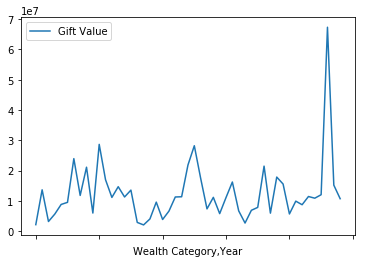

In [52]:
#Default line plot using the dataframe new that contains the subcategory wealth category
new_df.plot();

In [54]:
# Remove any  n/a records; these are not anoynymous donations but rather null records
dfinal = dfinal.dropna(how='any')
# dfinal.head(2)

TypeError: 'str' object is not callable

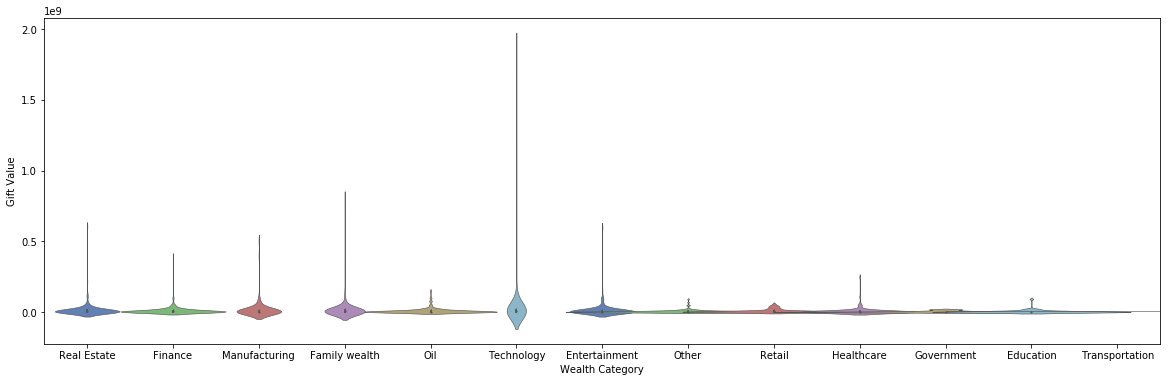

In [89]:
#Violin Plot to show correlation with wealth category and value of donations
fig,ax=plt.subplots(figsize=(20,6))

ax2 = sns.violinplot(x='Wealth Category', y='Gift Value', data=dfinal, scale_hue=True, gridsize=100,
               saturation=0.6, palette="muted", linewidth=.6, width=4, ax=ax, aspect=1)

plt.title("Violin Chart of Donations by Wealth Category 2015 to 2018")
plt.xlabel("Gift Value in Billions")

plt.savefig("Violin Chart of Donations.png")
plt.show()

In [90]:
# Create a group based on the values in the 'wealth category' column
wealth_grp =new_df.groupby('Wealth Category')
wealth_grp 
# Count how many times each maker appears in our group
sum_donations = wealth_grp['Gift Value'].sum()/1000000000

sum_donations

Wealth Category
Education         0.024695
Entertainment     0.054127
Family wealth     0.072765
Finance           0.050714
Government        0.018628
Healthcare        0.033171
Manufacturing     0.074917
Oil               0.044334
Other             0.024178
Real Estate       0.060879
Retail            0.035814
Technology        0.105470
Transportation    0.010730
Name: Gift Value, dtype: float64

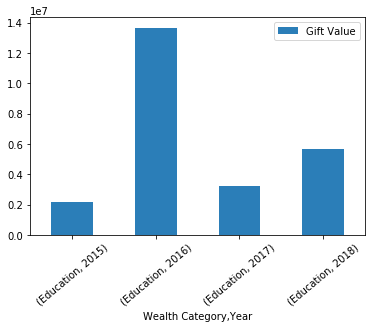

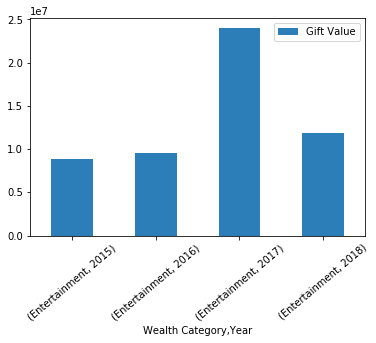

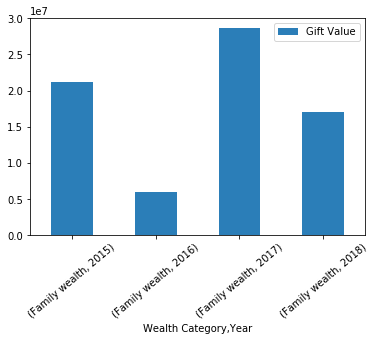

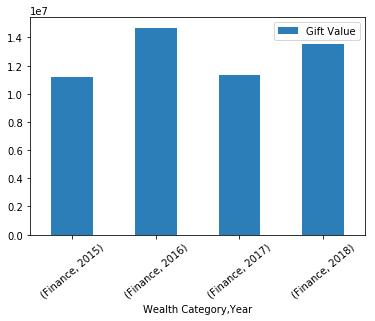

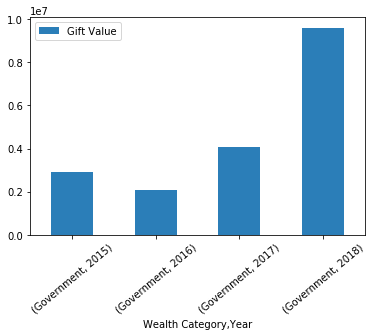

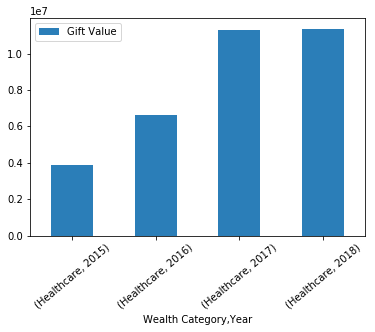

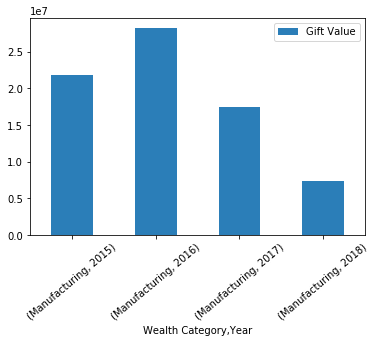

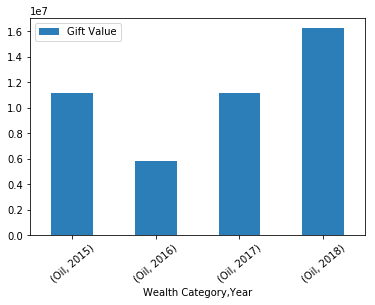

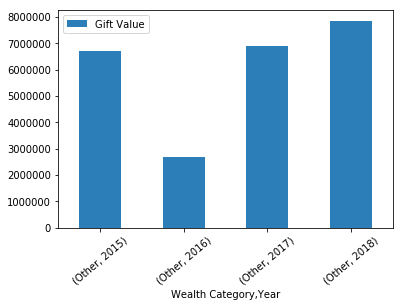

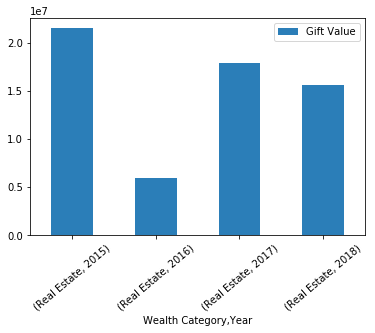

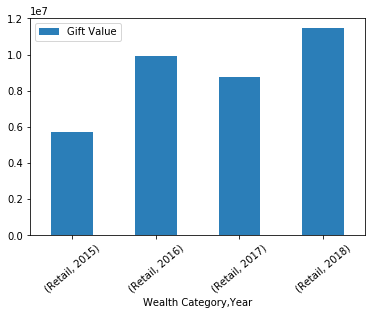

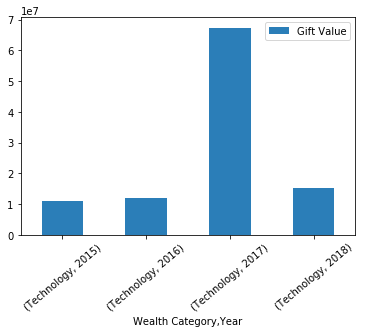

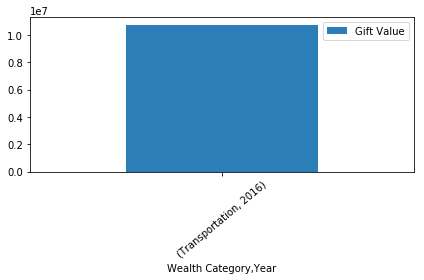

In [77]:
# Create a bar chart based off of the group series from above
count_chart = wealth_grp.plot(kind='bar',align="center", alpha=0.95, rot=40)

# Set the xlabel and ylabel using class methods
x_label=("Wealth Category","Year")
y_label=("Donation in ($Billions)")
plt.title=("Donor's Source of Wealth & Donation Amount")

plt.tight_layout()
plt.savefig("Multi_Chart_SourceofWealth_by_Year.png")
plt.show()

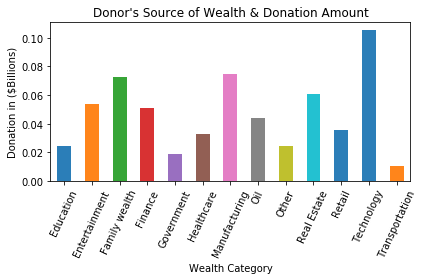

In [91]:
# Create a bar chart based off of the group series from above
count_chart = sum_donations.plot(kind='bar',align="center", alpha=0.95, rot=65)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Wealth Category")
count_chart.set_ylabel("Donation in ($Billions)")
count_chart.set_title("Donor's Source of Wealth & Donation Amount")

plt.tight_layout()
plt.savefig("Wealth by Source.png")
plt.show()


## Conclusion

The largest donation were made to a Foundation from Mark Zuckerberg and Priscilla Chan in 2017. Their source of wealth was in Technology from the state of California. This is not a surprising observation. Overall 95% of all donations come from Technology followed by Manufacturing, Family Wealth and Real Estate. 

There is a correlation with a donors source of wealth and their donation amount. Those living in areas where Technology is highest are presumably making more and therefore give more donations. Typical donation causes are to Foundations or Education institutions.